# How to use PolySMILES

In [1]:
#load module
import sys
sys.path.append("polysmiles")
from PolySMILES import PolySMILES
from polymer_graph_helper import draw_chem_graph

# Basic use
- Initiate PolySMILES class
- call "smiles_to_dict" method
    - Returning processed data as a dict object
    - Parse data to yield fragmented repeating units

In [2]:
smiles='[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1'

#init class
psm=PolySMILES()
psm.smiles_to_dict(smiles,calculate_descriptor=False)

{0: {'connect': 'block-block',
  'n': 30.0,
  'SMILES': '[Q]CC(c:1:c:c:c:c:c1)[Q]',
  'mw_unit': 104.15200000000004,
  'type': 'polymeric',
  'mn': 3124.5600000000013},
 1: {'connect': 'block-block',
  'n': 20.0,
  'SMILES': '[Q]CCO[QH]',
  'mw_unit': 45.06100000000001,
  'type': 'polymeric',
  'mn': 901.2200000000001}}

# Calculate descriptors
- RDKit desctiptors are set as default
- Repeating units are capped with "H" for calculation, as default (cap_atom="H")
- NaN will be replaced with zeros, as default (fill_nan=0)

In [3]:
#calculate desctiptor for each unit
psm.smiles_to_dict(smiles,calculate_descriptor=True)

{0: {'connect': 'block-block',
  'n': 30.0,
  'SMILES': '[Q]CC(c:1:c:c:c:c:c1)[Q]',
  'mw_unit': 104.15200000000004,
  'type': 'polymeric',
  'mn': 3124.5600000000013,
  'descriptor': array([ 2.16203704e+00,  1.13972222e+00,  2.16203704e+00,  1.13972222e+00,
          5.14757822e-01,  1.06168000e+02,  9.60880000e+01,  1.06078250e+02,
          4.20000000e+01,  0.00000000e+00, -3.07440828e-02, -6.22487417e-02,
          6.22487417e-02,  3.07440828e-02,  1.12500000e+00,  1.75000000e+00,
          2.12500000e+00,  1.38565969e+01,  1.01707103e+01,  1.79435775e+00,
         -1.89175125e+00,  1.96314056e+00, -1.73342650e+00,  5.13313817e+00,
          1.14041522e+00,  2.83208584e+00,  1.41384299e+02,  5.81999096e+00,
          5.09385813e+00,  5.09385813e+00,  3.93185165e+00,  2.97134377e+00,
          2.97134377e+00,  1.83915195e+00,  1.83915195e+00,  1.25107295e+00,
          1.25107295e+00,  7.13712832e-01,  7.13712832e-01, -7.80000000e-01,
          9.13675773e+01,  5.35850416e+00,  2.50

In [4]:
#calculate descriptors as the weight average of each unit
#if molecular weight of the polymer is not given, n will be 50 (default_n=50)
psm.smiles_to_weighted_descriptors(smiles)

{'total MW': 4025.7800000000016,
 'MaxEStateIndex': 3.3725511991879005,
 'MinEStateIndex': 0.9405470409875024,
 'MaxAbsEStateIndex': 3.3725511991879005,
 'MinAbsEStateIndex': 0.9405470409875024,
 'qed': 0.49059192863713025,
 'MolWt': 92.71410515726143,
 'HeavyAtomMolWt': 83.53671758019563,
 'ExactMolWt': 92.63837249569768,
 'NumValenceElectrons': 37.075031422482105,
 'NumRadicalElectrons': 0.0,
 'MaxPartialCharge': -0.014857776318648538,
 'MinPartialCharge': -0.1371116159504261,
 'MaxAbsPartialCharge': 0.1371116159504261,
 'MinAbsPartialCharge': 0.03286551279898857,
 'FpDensityMorgan1': 1.3208794320603707,
 'FpDensityMorgan2': 1.8059655520172488,
 'FpDensityMorgan3': 2.097017223991376,
 'BCUT2D_MWHI': 14.39216362927059,
 'BCUT2D_MWLOW': 10.33579922666663,
 'BCUT2D_CHGHI': 1.692709929567698,
 'BCUT2D_CHGLO': -1.8090582180487984,
 'BCUT2D_LOGPHI': 1.8138473168247138,
 'BCUT2D_LOGPLOW': -1.6964751431481129,
 'BCUT2D_MRHI': 4.842713705856024,
 'BCUT2D_MRLOW': 0.9563983344241958,
 'BalabanJ

# Use custom descriptor
- Set calculator and descriptor_names to the PolySMILES class
    - calculator: a function (input: mol object of RDKit, output: np array)
    - descriptor_names: array of descriptor names

- Here, we will try to use mordred descriptor
    - install "morderd" library by the folloing comand
        - conda install -c mordred-descriptor mordred 
        - or
        - pip install mordred

In [6]:
from mordred import Calculator, descriptors

#init PolySMILES with mordred_calculator
mordred_calculator = Calculator(descriptors, ignore_3D=True)
psm=PolySMILES(calculator=mordred_calculator,descriptor_names=mordred_calculator.descriptors)

#calculate weighted descriptors 
psm.smiles_to_weighted_descriptors(smiles)

{'total MW': 4025.7800000000016,
 mordred.ABCIndex.ABCIndex(): 4.707087337230499,
 mordred.ABCIndex.ABCGGIndex(): 4.529201075289335,
 mordred.AcidBase.AcidicGroupCount(): 0.0,
 mordred.AcidBase.BasicGroupCount(): 0.0,
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'): 8.723865249492235,
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpMax'): 1.9742479270290358,
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpDiam'): 3.9484958540580717,
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpAD'): 8.723865249492235,
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpMAD'): 1.2223952273340128,
 mordred.AdjacencyMatrix.AdjacencyMatrix('LogEE'): 2.7186390603139947,
 mordred.AdjacencyMatrix.AdjacencyMatrix('VE1'): 2.491700955746264,
 mordred.AdjacencyMatrix.AdjacencyMatrix('VE2'): 0.391078597269528,
 mordred.AdjacencyMatrix.AdjacencyMatrix('VE3'): 0.4530653147492775,
 mordred.AdjacencyMatrix.AdjacencyMatrix('VR1'): 19.03954575781735,
 mordred.AdjacencyMatrix.AdjacencyMatrix('VR2'): 2.536813993290502,
 mordred.Adjacenc

# Rules for expressing structures

<img src="pics/polymer_expression.PNG" width=600>

<img src="pics/molecular_weight.PNG" width=300>

# Show graph (under construction)
- As a NetworkX object

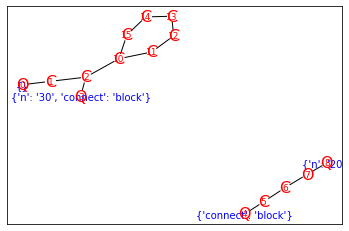

In [7]:
g,_=psm.smiles_to_dict(smiles,graph_mode=True)
draw_chem_graph(g)